<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-07-18 03:14:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-18 03:14:15 (11.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
train_df = pd.read_csv('loan_train.csv')
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-07-18 03:14:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-07-18 03:14:16 (373 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [5]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [6]:
df = pd.concat([train_df,test_df], keys = [0,1])

In [7]:
df.shape

(400, 10)

### Convert to date time object 

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0 0           0             0     PAIDOFF       1000     30     2016-09-08   
  1           2             2     PAIDOFF       1000     30     2016-09-08   
  2           3             3     PAIDOFF       1000     15     2016-09-08   
  3           4             4     PAIDOFF       1000     30     2016-09-09   
  4           6             6     PAIDOFF       1000     30     2016-09-09   

      due_date  age             education  Gender  
0 0 2016-10-07   45  High School or Below    male  
  1 2016-10-07   33              Bechalor  female  
  2 2016-09-22   27               college    male  
  3 2016-10-08   28               college  female  
  4 2016-10-08   29               college    male

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [10]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



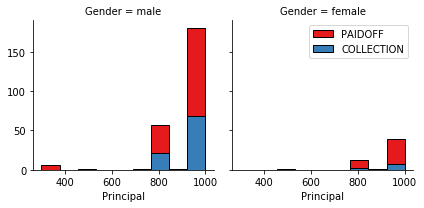

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

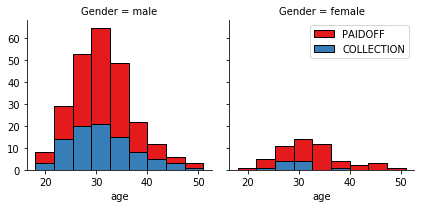

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

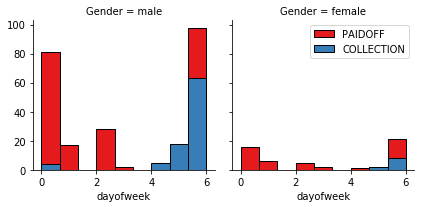

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0 0           0             0     PAIDOFF       1000     30     2016-09-08   
  1           2             2     PAIDOFF       1000     30     2016-09-08   
  2           3             3     PAIDOFF       1000     15     2016-09-08   
  3           4             4     PAIDOFF       1000     30     2016-09-09   
  4           6             6     PAIDOFF       1000     30     2016-09-09   

      due_date  age             education  Gender  dayofweek  weekend  
0 0 2016-10-07   45  High School or Below    male          3        0  
  1 2016-10-07   33              Bechalor  female          3        0  
  2 2016-09-22   27               college    male          3        0  
  3 2016-10-08   28               college  female          4        1  
  4 2016-10-08   29               college    male          4        1

## Convert Categorical features to numerical values

Lets look at gender:

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0 0           0             0     PAIDOFF       1000     30     2016-09-08   
  1           2             2     PAIDOFF       1000     30     2016-09-08   
  2           3             3     PAIDOFF       1000     15     2016-09-08   
  3           4             4     PAIDOFF       1000     30     2016-09-09   
  4           6             6     PAIDOFF       1000     30     2016-09-09   

      due_date  age             education  Gender  dayofweek  weekend  
0 0 2016-10-07   45  High School or Below       0          3        0  
  1 2016-10-07   33              Bechalor       1          3        0  
  2 2016-09-22   27               college       0          3        0  
  3 2016-10-08   28               college       1          4        1  
  4 2016-10-08   29               college       0          4        1

## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

Principal  terms  age  Gender             education
0 0       1000     30   45       0  High School or Below
  1       1000     30   33       1              Bechalor
  2       1000     15   27       0               college
  3       1000     30   28       1               college
  4       1000     30   29       0               college

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0 0       1000     30   45       0        0         0                     1   
  1       1000     30   33       1        0         1                     0   
  2       1000     15   27       0        0         0                     0   
  3       1000     30   28       1        1         0                     0   
  4       1000     30   29       0        1         0                     0   

     college  
0 0        0  
  1        0  
  2        1  
  3        1  
  4        1

### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0 0       1000     30   45       0        0         0                     1   
  1       1000     30   33       1        0         1                     0   
  2       1000     15   27       0        0         0                     0   
  3       1000     30   28       1        1         0                     0   
  4       1000     30   29       0        1         0                     0   

     college  
0 0        0  
  1        0  
  2        1  
  3        1  
  4        1

What are our lables?

In [21]:
y_train1 = df['loan_status'].xs(0).values
y_test1 = df['loan_status'].xs(1).values
y_train1[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.34185798, -0.43236977,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896]])

In [23]:
X = pd.DataFrame(X, index=Feature.index, columns=Feature.columns)
X.head(10)

Principal     terms       age    Gender   weekend  Bechalor  \
0 0   0.501302  0.920894  2.313350 -0.432370 -1.218389 -0.386556   
  1   0.501302  0.920894  0.321944  2.312835 -1.218389  2.586949   
  2   0.501302 -0.933255 -0.673759 -0.432370 -1.218389 -0.386556   
  3   0.501302  0.920894 -0.507808  2.312835  0.820756 -0.386556   
  4   0.501302  0.920894 -0.341858 -0.432370  0.820756 -0.386556   
  5   0.501302  0.920894  0.819795 -0.432370  0.820756 -0.386556   
  6   0.501302  0.920894 -0.507808 -0.432370  0.820756 -0.386556   
  7  -1.162770 -0.933255 -0.839709 -0.432370  0.820756 -0.386556   
  8  -5.322951 -1.922135 -0.341858 -0.432370  0.820756 -0.386556   
  9   0.501302 -0.933255  1.317647 -0.432370  0.820756 -0.386556   

     High School or Below   college  
0 0              1.151339 -0.868554  
  1             -0.868554 -0.868554  
  2             -0.868554  1.151339  
  3             -0.868554  1.151339  
  4             -0.868554  1.151339  
  5             -0.868554  1.151339  
  6             -0.868554  1.151339  
  7             -0.868554  1.151339  
  8             -0.868554  1.151339  
  9              1.151339 -0.868554

In [24]:
# Separate Train data and test data
X_train1 = X.xs(0)
X_test1 = X.xs(1)

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_train1, y_train1, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [27]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 
knc = KNeighborsClassifier().fit(X_train, y_train)
knc_predict=knc.predict(X_test)

print("accuracy Score (training) for Decision Tree:{0:6f}".format(knc.score(X_test,y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(y_test,knc_predict))

accuracy Score (training) for Decision Tree:0.757143
Confusion Matrix for Decision Tree
[[ 7  8]
 [ 9 46]]


In [28]:
#Hyperparameter tuning done for decision tree classifier
#GRID SEARCH----------------------------------------
print("GridSearchCV-KNN")
parameters={'n_neighbors': range(2,10,1),'p': (1,2)}
knc_grid = GridSearchCV(knc,parameters)
knc_grid.fit(X_train, y_train)
grid_parm=knc_grid.best_params_
print(grid_parm)

GridSearchCV-KNN
{'n_neighbors': 7, 'p': 1}


In [29]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
knc = KNeighborsClassifier(**grid_parm)

knc.fit(X_train,y_train)
knc_predict = knc.predict(X_test)


#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) after hypertuning randomized search for KNN:{0:6f}".format(knc.score(X_train,y_train)))

print("Confusion Matrix after hypertuning for KNN")
print(confusion_matrix(y_test,knc_predict))
print("=== Classification Report ===")
print(classification_report(y_test,knc_predict))

knc_cv_score = cross_val_score(knc, X_train, y_train, cv=10, scoring="balanced_accuracy")
print(knc_cv_score)
print('\n')


accuracy Score (training) after hypertuning randomized search for KNN:0.800725
Confusion Matrix after hypertuning for KNN
[[ 7  8]
 [ 9 46]]
=== Classification Report ===
              precision    recall  f1-score   support

  COLLECTION       0.44      0.47      0.45        15
     PAIDOFF       0.85      0.84      0.84        55

   micro avg       0.76      0.76      0.76        70
   macro avg       0.64      0.65      0.65        70
weighted avg       0.76      0.76      0.76        70

[0.85119048 0.64285714 0.54761905 0.71428571 0.71428571 0.51785714
 0.56785714 0.51785714 0.5        0.49285714]




# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_predict=clf.predict(X_test)
print("accuracy Score (training) for Decision Tree:{0:6f}".format(clf.score(X_test,y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(y_test,clf_predict))


accuracy Score (training) for Decision Tree:0.700000
Confusion Matrix for Decision Tree
[[ 8  7]
 [14 41]]


In [32]:
#GRID SEARCH----------------------------------------
print("GridSearchCV-Decision tree")

parameters={'max_features': range(2,7,1), 'min_samples_split' : range(2,10,1),'min_samples_leaf' : range(10,100,5),'max_depth': range(5,30,3),'criterion':['gini','entropy']}
clf_grid = GridSearchCV(clf,parameters)
clf_grid.fit(X_train, y_train)
grid_parm=clf_grid.best_params_
print(grid_parm)


GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 26, 'max_features': 6, 'min_samples_leaf': 25, 'min_samples_split': 8}


In [33]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
clf = DecisionTreeClassifier(**grid_parm)

clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)


#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) after hypertuning randomized search for Decision Tree:{0:6f}".format(clf.score(X_train,y_train)))

print("Confusion Matrix after hypertuning for Decision Tree")
print(confusion_matrix(y_test,clf_predict))
print("=== Classification Report ===")
print(classification_report(y_test,clf_predict))

clf_cv_score = cross_val_score(clf, X_train, y_train, cv=10, scoring="balanced_accuracy")
print(clf_cv_score)
print('\n')


accuracy Score (training) after hypertuning randomized search for Decision Tree:0.760870
Confusion Matrix after hypertuning for Decision Tree
[[ 1 14]
 [ 5 50]]
=== Classification Report ===
              precision    recall  f1-score   support

  COLLECTION       0.17      0.07      0.10        15
     PAIDOFF       0.78      0.91      0.84        55

   micro avg       0.73      0.73      0.73        70
   macro avg       0.47      0.49      0.47        70
weighted avg       0.65      0.73      0.68        70

[0.72619048 0.52380952 0.5        0.71428571 0.42857143 0.52142857
 0.78214286 0.425      0.5        0.63571429]




# Support Vector Machine

In [34]:
from sklearn.svm import SVC

In [35]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 
svm = SVC()
svm.fit(X_train, y_train)
svm_predict=svm.predict(X_test)
print("accuracy Score (training) for Support Vector Machine:{0:6f}".format(svm.score(X_test,y_test)))
print("Confusion Matrix for Support Vector Machine")
print(confusion_matrix(y_test,svm_predict))
print("=== Classification Report ===")
print(classification_report(y_test,svm_predict))

accuracy Score (training) for Support Vector Machine:0.742857
Confusion Matrix for Support Vector Machine
[[ 4 11]
 [ 7 48]]
=== Classification Report ===
              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict=lr.predict(X_test)
print("accuracy Score (training) for Logistic Regression:{0:6f}".format(lr.score(X_test,y_test)))
print("Confusion Matrix for Logistic Regression")
print(confusion_matrix(y_test,lr_predict))
print("=== Classification Report ===")
print(classification_report(y_test,lr_predict))

accuracy Score (training) for Logistic Regression:0.728571
Confusion Matrix for Logistic Regression
[[ 2 13]
 [ 6 49]]
=== Classification Report ===
              precision    recall  f1-score   support

  COLLECTION       0.25      0.13      0.17        15
     PAIDOFF       0.79      0.89      0.84        55

   micro avg       0.73      0.73      0.73        70
   macro avg       0.52      0.51      0.51        70
weighted avg       0.67      0.73      0.70        70



# Model Evaluation using Test set

In [38]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [39]:
# Jaccard score for 4 models

knc_predict = knc.predict(X_test1)
knc_j_index = round(jaccard_similarity_score(y_true=y_test1,y_pred=knc_predict),2)

clf_predict = clf.predict(X_test1)
clf_j_index = round(jaccard_similarity_score(y_true=y_test1,y_pred=clf_predict),2)

svm_predict = svm.predict(X_test1)
svm_j_index = round(jaccard_similarity_score(y_true=y_test1,y_pred=svm_predict),2)

lr_predict = lr.predict(X_test1)
lr_j_index = round(jaccard_similarity_score(y_true=y_test1,y_pred=lr_predict),2)

In [40]:
#Combine jaccard results to list
j_list = [knc_j_index, clf_j_index, svm_j_index, lr_j_index]

In [41]:
# F1 score for 4 models

knc_f1_index = round(f1_score(y_test1,knc_predict,average="macro"),2)

clf_f1_index = round(f1_score(y_test1,clf_predict,average="macro"),2)

svm_f1_index = round(f1_score(y_test1,svm_predict,average="macro"),2)

lr_f1_index = round(f1_score(y_test1,lr_predict,average="macro"),2)

In [42]:
#Combine F1 results to list
f1_list = [knc_f1_index, clf_f1_index, svm_f1_index, lr_f1_index]

In [43]:
#Encode label to numeric value
le = preprocessing.LabelEncoder()
le.fit(y_test1.astype(str))
y_test1_str = le.transform(y_test1.astype(str))
lr_predict_str = le.transform(lr_predict.astype(str))


# log loss score for logistic regression
lr_ll_index = round(log_loss(y_test1_str,lr_predict_str),2)

In [44]:
#Combine Log Loss results to list
lloss_list = [np.nan, np.nan, np.nan, lr_ll_index]

In [45]:
#Combine overall result
report = {'Algorithm': ['KNN','Decision Tree','SVM','Logistic Regression'],
          'Jaccard': j_list,
          'F1- Score':f1_list,
          'LogLoss': lloss_list
         }
report

{'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'],
 'Jaccard': [0.63, 0.76, 0.81, 0.76],
 'F1- Score': [0.49, 0.55, 0.69, 0.55],
 'LogLoss': [nan, nan, nan, 8.32]}

In [46]:
#Final Report to df
report_df = pd.DataFrame(report).set_index('Algorithm')
report_df

,Jaccard,F1- Score,LogLoss
Algorithm,,,
KNN,0.63,0.49,NaN
Decision Tree,0.76,0.55,NaN
SVM,0.81,0.69,NaN
Logistic Regression,0.76,0.55,8.32


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>